In [ ]:
import pandas as pd
import numpy as np
import pymysql
pymysql.install_as_MySQLdb()

In [1]:
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists
from urllib.parse import quote_plus as urlquote

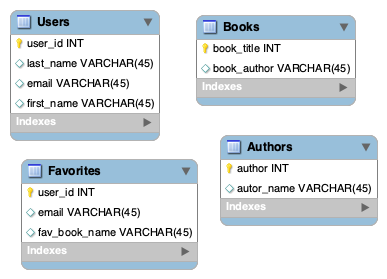